## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [25]:
from sklearn.datasets import load_boston

In [26]:
data = load_boston()

In [27]:
def price(rm, k, b):
    return k * rm + b

In [28]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y)) 

In [29]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient +=(y_i - y_hat_i)*x_i
    
    return -2 / n*gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient +=(y_i - y_hat_i)
        
    return -2 / n * gradient

In [30]:
import random

In [31]:
trying_times = 20000

X, y = data['data'], data['target']
X_rm = X[:, 5]
min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03

for i in range(trying_times):
    price_by_k_and_b = price(X_rm,current_k,current_b)
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i%50 == 0:
            print("When time is:{},get current_k:{}, get current_b:{},the loss is{}".format(i,current_k, current_b, min_loss))
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    current_k = current_k + (-k_gradient)*learning_rate
    current_b = current_b + (-b_gradient)*learning_rate     

When time is:0,get current_k:37.64859147320328, get current_b:54.15444857609873,the loss is72392.04259441937
When time is:50,get current_k:-3.2439599959483467, get current_b:47.624587844089426,the loss is140.83383091005098
When time is:100,get current_k:-3.797306525168439, get current_b:47.43637641652483,the loss is126.66181908620634
When time is:150,get current_k:-3.789707146268669, get current_b:47.336470163936575,the loss is126.45962189933884
When time is:200,get current_k:-3.7743255301781033, get current_b:47.23790880672552,the loss is126.26060528883669
When time is:250,get current_k:-3.758854049263705, get current_b:47.13948291897091,the loss is126.06206721000834
When time is:300,get current_k:-3.743399652994383, get current_b:47.04117554186273,the loss is125.86400599243719
When time is:350,get current_k:-3.7279638065973772, get current_b:46.942986299423694,the loss is125.66642049066753
When time is:400,get current_k:-3.7125465084433853, get current_b:46.84491504644892,the loss is

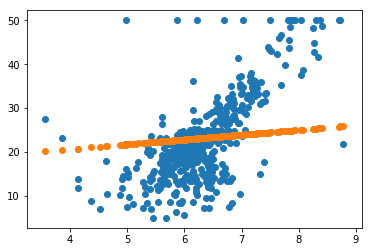

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
X_rm = X[:, 5]
k = 1.0939527744738013
b = 16.270205894371088
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

def draw_rm_and_price():
    plt.scatter(X_rm, y)
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

# Dynamic Programming

decorator

In [56]:
from collections import defaultdict

In [57]:
from functools import wraps

In [58]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f) #保持函数命名
    def wrap(n):
        result = f(n)
        print("call!")
        called_time_with_arg[(f.__name__,n)] +=1
        return result
    return wrap

In [59]:
@get_call_time
def add_10(n):
    return n+10

In [63]:
add_10(7)

call!


17

In [65]:
called_time_with_arg

defaultdict(int, {('add_10', 6): 2, ('add_10', 7): 1})

Get the best splitting

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
from functools import wraps

In [8]:
price = defaultdict(int)
for i,p in enumerate(original_price):
    price[i+1] = p

In [41]:
def memo(f):
    memo_computed = {}
    @wraps(f)
    def wrap(arg):
        #result = None
        if not arg in memo_computed: 
            result = f(arg)
            memo_computed[arg] = result
        else:
            result = memo_computed[arg]
        return result
    return wrap

In [ ]:
solution = {}
@memo
def r(n):
    max_price,max_split = max(
        [(price[n], 0)] + [(r(i)+r(n-i), i) for i in range (1,n)], key = lambda x:x[0]
    )
    solution[n] = (n-max_split, max_split)

In [68]:
solution = {}
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    return max_price

In [69]:
r(50)

157

In [71]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6)}

In [128]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split ==0:
        return [left_split] 
    return parse_solution(left_split) + parse_solution(right_split)

In [129]:
parse_solution(50)

[11, 11, 11, 11, 6]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
def price(rm, k, b):
    return k * rm + b

In [4]:

def loss(y,y_hat):
    a = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i-y_hat_i >0:
            a += y_i-y_hat_i
        else:
            a +=  y_hat_i-y_i
    return a/len(y)

In [5]:
#y=[1,2,3,4,5,6,8,10]
#y_hat = [2,3,3,5,4,20,1,8]
#loss(y,y_hat)

In [6]:
def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i> y_hat_i:
            gradient = -x_i
        else:
            gradient = x_i
    return gradient/n

def partial_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        if y_i> y_hat_i:
            gradient = -1
        else:
            gradient = 1
    return gradient/n

In [7]:
import random
trying_times = 20000

X, y = data['data'], data['target']
X_rm = X[:, 5]
min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 0.2
for i in range(trying_times):
    price_by_k_and_b = price(X_rm,current_k,current_b)
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i%50 == 0:
            print("When time is:{},get current_k:{}, get current_b:{},the loss is:{}".format(i,current_k, current_b, min_loss))
    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b(y,price_by_k_and_b)
    current_k = current_k + (-k_gradient)*learning_rate
    current_b = current_b + (-b_gradient)*learning_rate  

When time is:0,get current_k:50.47124660509826, get current_b:-73.50004686957803,the loss is:221.16047879322338
When time is:50,get current_k:50.352076644624006, get current_b:-73.51980971542815,the loss is:220.39177631583755
When time is:100,get current_k:50.232906684149754, get current_b:-73.53957256127828,the loss is:219.62307383845163
When time is:150,get current_k:50.1137367236755, get current_b:-73.5593354071284,the loss is:218.8543713610658
When time is:200,get current_k:49.99456676320125, get current_b:-73.57909825297853,the loss is:218.0856688836796
When time is:250,get current_k:49.875396802726996, get current_b:-73.59886109882865,the loss is:217.3169664062939
When time is:300,get current_k:49.756226842252744, get current_b:-73.61862394467877,the loss is:216.54826392890772
When time is:350,get current_k:49.63705688177849, get current_b:-73.6383867905289,the loss is:215.77956145152174
When time is:400,get current_k:49.51788692130424, get current_b:-73.65814963637902,the loss i

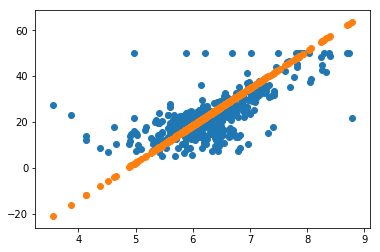

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
X_rm = X[:, 5]
k =16.26946794898781
b =-79.17198362856368
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

def draw_rm_and_price():
    plt.scatter(X_rm, y)
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

选择合适的learning_rate很重要啊

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
solution = {}
change_str = {}
from functools import lru_cache
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1),(string1[:-1],string2)), 
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2),(string1,string2[:-1])), 
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '',(string1[:-1], string2[:-1]))
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2),(string1[:-1], string2[:-1]))

    candidates.append(both_forward)
    
    min_distance, operation, pre_str= min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = pre_str,operation
    return min_distance

In [2]:
edit_distance('ABDEFFFS', 'ABCEDS')

4

In [3]:
solution

{('A', 'A'): (('', ''), ''),
 ('A', 'AB'): (('A', 'A'), 'ADD B'),
 ('A', 'ABC'): (('A', 'AB'), 'ADD C'),
 ('A', 'ABCE'): (('A', 'ABC'), 'ADD E'),
 ('A', 'ABCED'): (('A', 'ABCE'), 'ADD D'),
 ('A', 'ABCEDS'): (('A', 'ABCED'), 'ADD S'),
 ('AB', 'A'): (('A', 'A'), 'DEL B'),
 ('AB', 'AB'): (('A', 'A'), ''),
 ('AB', 'ABC'): (('AB', 'AB'), 'ADD C'),
 ('AB', 'ABCE'): (('AB', 'ABC'), 'ADD E'),
 ('AB', 'ABCED'): (('AB', 'ABCE'), 'ADD D'),
 ('AB', 'ABCEDS'): (('AB', 'ABCED'), 'ADD S'),
 ('ABD', 'A'): (('AB', 'A'), 'DEL D'),
 ('ABD', 'AB'): (('AB', 'AB'), 'DEL D'),
 ('ABD', 'ABC'): (('AB', 'AB'), 'SUB D => C'),
 ('ABD', 'ABCE'): (('ABD', 'ABC'), 'ADD E'),
 ('ABD', 'ABCED'): (('AB', 'ABCE'), ''),
 ('ABD', 'ABCEDS'): (('ABD', 'ABCED'), 'ADD S'),
 ('ABDE', 'A'): (('ABD', 'A'), 'DEL E'),
 ('ABDE', 'AB'): (('ABD', 'AB'), 'DEL E'),
 ('ABDE', 'ABC'): (('ABD', 'ABC'), 'DEL E'),
 ('ABDE', 'ABCE'): (('ABD', 'ABC'), ''),
 ('ABDE', 'ABCED'): (('ABDE', 'ABCE'), 'ADD D'),
 ('ABDE', 'ABCEDS'): (('ABDE', 'ABCED')

In [4]:
value_ops=[]
def parse_solution(string1, string2):
    n = len(string1)-1
    while n >= 0:
        left_split,right_split = solution[(string1, string2)]
        (string1, string2) = left_split
        value_ops.append(right_split+ '(第{}个元素)'.format(n+1))
        for i in value_ops: 
            if i==(""+'(第{}个元素)'.format(n+1)): value_ops.remove(i) 
        n = n-1 
    return value_ops

In [5]:
 parse_solution('ABDEFFFS', 'ABCEDS')

['DEL F(第7个元素)', 'DEL F(第6个元素)', 'SUB F => D(第5个元素)', 'SUB D => C(第3个元素)']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

4. Using the simple words to describe: What's the machine leanring.¶

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
文本替换；输入优化；文本纠错

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

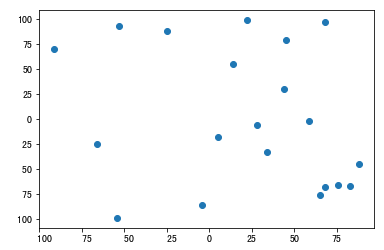

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

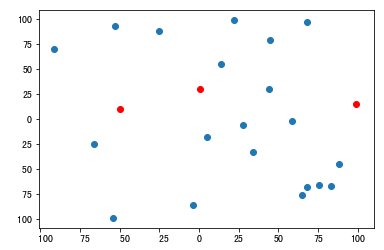

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro